# Task 1 - Optimizers
Team Members

*   Libin Kutty
*   Viju Sudhi
*   Ritu Gahir


In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

# **Model 1**

---
    Conv2d 32 - 3x3- Relu
    Maxpool 2x2
    Conv2d 64 - 3x3- Relu
    Maxpool 2x2
    Conv2d 128 - 3x3- Relu
    Maxpool 2x2
    Flatten
    Dense 64
    Dense 10
  


In [3]:
def model():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), input_shape=(32,32,3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

  model.add(Dense(64))
  #model.add(Activation('relu'))

  model.add(Dense(10))
  model.add(Activation('softmax'))

  return model

# **Model 2**

---
    Conv2d 32 - 3x3- Relu
    Conv2d 32 - 3x3- Relu
    Maxpool 2x2
    Conv2d 64 - 3x3- Relu
    Conv2d 64 - 3x3- Relu
    Maxpool 2x2
    Conv2d 128 - 3x3- Relu
    Conv2d 128 - 3x3- Relu
    Maxpool 2x2
    Flatten
    Dense 128
    Dense 10

In [4]:
def model2():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

  model.add(Dense(10, activation='softmax'))

  return model

# Cifar10 Dataset

In [5]:
(train_imgs, train_lbls), (test_imgs, test_lbls) = tf.keras.datasets.cifar10.load_data()

train_imgs = (train_imgs.astype(np.float32) / 255.).reshape((-1, 32, 32, 3))
train_lbls = train_lbls.astype(np.int32)

test_imgs = (test_imgs.astype(np.float32) / 255.).reshape((-1, 32, 32, 3))
test_lbls = test_lbls.astype(np.int32)

batch_size = 128

train_data = tf.data.Dataset.from_tensor_slices((train_imgs, train_lbls))

train_data = train_data.shuffle(train_imgs.shape[0])
train_data = train_data.batch(batch_size)
train_data = train_data.repeat(5)


test_data = tf.data.Dataset.from_tensor_slices((test_imgs, test_lbls))
test_data = test_data.batch(batch_size)

170500096/170498071 [==============================] - 3s 0us/step


**Training**

In [6]:
def train(model, opt):
  step_graph = []
  loss_graph = []
  acc_graph = []
  train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
  loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

  for step, (img_batch, lbl_batch) in enumerate(train_data):
    with tf.GradientTape() as tape:
        logits = model(img_batch)
        xent = loss_fn(lbl_batch, logits)

    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)

    opt.apply_gradients(zip(grads, varis))
    
    train_acc_metric(lbl_batch, logits)
    
    if not step % 100:
      step_graph.append(step)
      loss_graph.append(xent)
      acc_graph.append(train_acc_metric.result())
      print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
      train_acc_metric.reset_states()
  
  return step_graph, loss_graph, acc_graph

# With Model 1

In [7]:
step_all = []
loss_all = []
acc_all = []
opt_label = []

##  Adam Optimizer

**Default Hyperparamet**

In [8]:
model_adam_opt_def = model()
opt1 = tf.optimizers.Adam()

step_adam, loss_adam, acc_adam = train(model_adam_opt_def, opt1)

step_all.append(step_adam)
loss_all.append(loss_adam)
acc_all.append(acc_adam)
opt_label.append('Adam')

Loss: 2.303837776184082 Accuracy: 0.078125
Loss: 2.157081127166748 Accuracy: 0.20429687201976776
Loss: 2.10896635055542 Accuracy: 0.3270312547683716
Loss: 2.1266260147094727 Accuracy: 0.3773437440395355
Loss: 1.9711540937423706 Accuracy: 0.41130802035331726
Loss: 1.9503726959228516 Accuracy: 0.44343748688697815
Loss: 1.998337984085083 Accuracy: 0.46867188811302185
Loss: 1.9275232553482056 Accuracy: 0.48218750953674316
Loss: 1.9491047859191895 Accuracy: 0.49396172165870667
Loss: 1.9478896856307983 Accuracy: 0.5132812261581421
Loss: 1.898404836654663 Accuracy: 0.5278906226158142
Loss: 1.876410722732544 Accuracy: 0.532421886920929
Loss: 1.9018476009368896 Accuracy: 0.5416405200958252
Loss: 1.9042229652404785 Accuracy: 0.5635156035423279
Loss: 1.8867912292480469 Accuracy: 0.563281238079071
Loss: 1.8248512744903564 Accuracy: 0.5732031464576721
Loss: 1.9763151407241821 Accuracy: 0.5749686360359192
Loss: 1.901881217956543 Accuracy: 0.5821093916893005
Loss: 1.9327774047851562 Accuracy: 0.59523

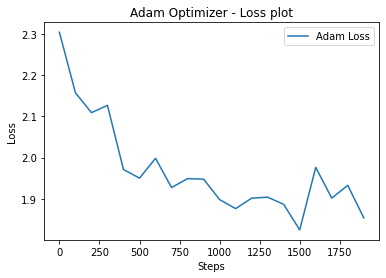

In [9]:
plt.plot(step_adam, loss_adam, label="Adam Loss")

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('Adam Optimizer - Loss plot')
plt.legend()
plt.show()

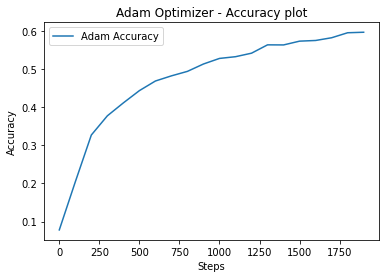

In [10]:
plt.plot(step_adam, acc_adam, label="Adam Accuracy")

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('Adam Optimizer - Accuracy plot')
plt.legend()
plt.show()

**Learning Rate = 0.01**

In [11]:
model_adam_opt_lr1 = model()
opt2 = tf.optimizers.Adam(learning_rate=0.01)

step_adam1, loss_adam1, acc_adam1 = train(model_adam_opt_lr1, opt2)

step_all.append(step_adam1)
loss_all.append(loss_adam1)
acc_all.append(acc_adam1)
opt_label.append('Adam lr 0.01')

Loss: 2.3020472526550293 Accuracy: 0.109375
Loss: 2.21494197845459 Accuracy: 0.17281250655651093
Loss: 2.1720213890075684 Accuracy: 0.24015624821186066
Loss: 2.2077908515930176 Accuracy: 0.28929686546325684
Loss: 2.1130943298339844 Accuracy: 0.27509409189224243
Loss: 2.144930839538574 Accuracy: 0.26875001192092896
Loss: 2.1924092769622803 Accuracy: 0.24992187321186066
Loss: 2.159109115600586 Accuracy: 0.2771874964237213
Loss: 2.1361284255981445 Accuracy: 0.2781524360179901
Loss: 2.2650976181030273 Accuracy: 0.2205468714237213
Loss: 2.2577474117279053 Accuracy: 0.177734375
Loss: 2.3283376693725586 Accuracy: 0.1223437488079071
Loss: 2.3439626693725586 Accuracy: 0.09880802780389786
Loss: 2.3674001693725586 Accuracy: 0.09523437172174454
Loss: 2.3674001693725586 Accuracy: 0.1008593738079071
Loss: 2.3049001693725586 Accuracy: 0.10289062559604645
Loss: 2.3439626693725586 Accuracy: 0.10053324699401855
Loss: 2.3517751693725586 Accuracy: 0.0964062511920929
Loss: 2.3674001693725586 Accuracy: 0.09

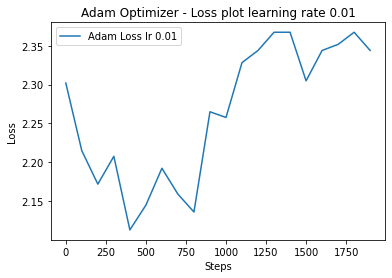

In [12]:
plt.plot(step_adam1, loss_adam1, label="Adam Loss lr 0.01")

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('Adam Optimizer - Loss plot learning rate 0.01')
plt.legend()
plt.show()

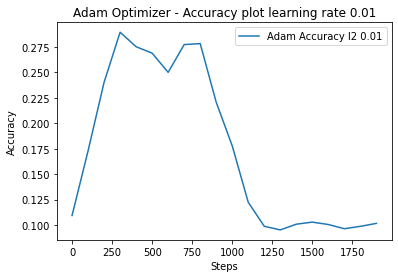

In [13]:
plt.plot(step_adam1, acc_adam1, label="Adam Accuracy l2 0.01")

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('Adam Optimizer - Accuracy plot learning rate 0.01')
plt.legend()
plt.show()

**Learning rate = 0.1**

In [14]:
model_adam_opt_lr2 = model()
opt3 = tf.optimizers.Adam(learning_rate=0.1)

step_adam2, loss_adam2, acc_adam2 = train(model_adam_opt_lr2, opt3)

step_all.append(step_adam2)
loss_all.append(loss_adam2)
acc_all.append(acc_adam2)
opt_label.append('Adam lr 0.1')

Loss: 2.3029959201812744 Accuracy: 0.09375
Loss: 2.3674001693725586 Accuracy: 0.09953124821186066
Loss: 2.3674001693725586 Accuracy: 0.09734375029802322
Loss: 2.3595876693725586 Accuracy: 0.10046874731779099
Loss: 2.3517751693725586 Accuracy: 0.10649310052394867
Loss: 2.3674001693725586 Accuracy: 0.10140624642372131
Loss: 2.3830251693725586 Accuracy: 0.09976562857627869
Loss: 2.3439626693725586 Accuracy: 0.10101562738418579
Loss: 2.3830251693725586 Accuracy: 0.10061167180538177
Loss: 2.3752126693725586 Accuracy: 0.09921874850988388
Loss: 2.3752126693725586 Accuracy: 0.10117187350988388
Loss: 2.3049001693725586 Accuracy: 0.10343749821186066
Loss: 2.3752126693725586 Accuracy: 0.09982747584581375
Loss: 2.3674001693725586 Accuracy: 0.09859374910593033
Loss: 2.4064626693725586 Accuracy: 0.10218749940395355
Loss: 2.3439626693725586 Accuracy: 0.10257812589406967
Loss: 2.3517751693725586 Accuracy: 0.10155269503593445
Loss: 2.3595876693725586 Accuracy: 0.10367187857627869
Loss: 2.39083766937255

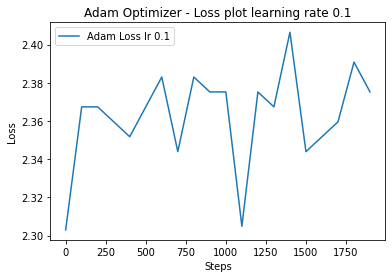

In [15]:
plt.plot(step_adam2, loss_adam2, label="Adam Loss lr 0.1")

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('Adam Optimizer - Loss plot learning rate 0.1')
plt.legend()
plt.show()

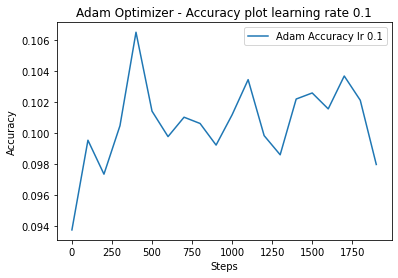

In [16]:
plt.plot(step_adam2, acc_adam2, label="Adam Accuracy lr 0.1")

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('Adam Optimizer - Accuracy plot learning rate 0.1')
plt.legend()
plt.show()

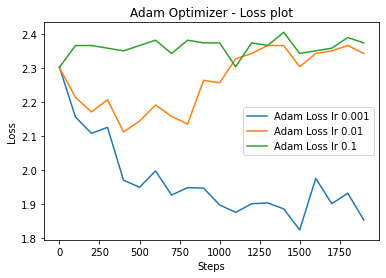

In [17]:
plt.plot(step_adam, loss_adam, label="Adam Loss lr 0.001")
plt.plot(step_adam1, loss_adam1, label="Adam Loss lr 0.01")
plt.plot(step_adam2, loss_adam2, label="Adam Loss lr 0.1")

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('Adam Optimizer - Loss plot')
plt.legend()
plt.show()

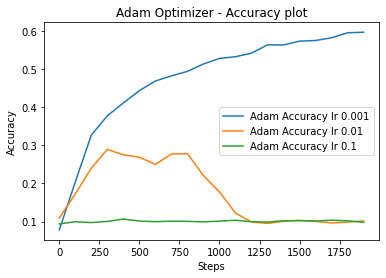

In [18]:
plt.plot(step_adam, acc_adam, label="Adam Accuracy lr 0.001")
plt.plot(step_adam1, acc_adam1, label="Adam Accuracy lr 0.01")
plt.plot(step_adam2, acc_adam2, label="Adam Accuracy lr 0.1")

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('Adam Optimizer - Accuracy plot')
plt.legend()
plt.show()

## SGD Optimizer

**Default Hyperparameter**

In [19]:
model_SGD_opt_def = model()
opt_sgd = tf.optimizers.SGD()

step_sgd, loss_sgd, acc_sgd = train(model_SGD_opt_def, opt_sgd)

step_all.append(step_sgd)
loss_all.append(loss_sgd)
acc_all.append(acc_sgd)
opt_label.append('SGD Default')

Loss: 2.3006091117858887 Accuracy: 0.125
Loss: 2.300755023956299 Accuracy: 0.09796874970197678
Loss: 2.300507068634033 Accuracy: 0.09554687142372131
Loss: 2.3004164695739746 Accuracy: 0.1008593738079071
Loss: 2.3044371604919434 Accuracy: 0.10547365248203278
Loss: 2.298192262649536 Accuracy: 0.09992187470197678
Loss: 2.293285369873047 Accuracy: 0.09914062172174454
Loss: 2.2869579792022705 Accuracy: 0.10367187857627869
Loss: 2.3039209842681885 Accuracy: 0.09661229699850082
Loss: 2.2940263748168945 Accuracy: 0.10054687410593033
Loss: 2.295147180557251 Accuracy: 0.10140624642372131
Loss: 2.3022706508636475 Accuracy: 0.10000000149011612
Loss: 2.2944653034210205 Accuracy: 0.10092534869909286
Loss: 2.2887935638427734 Accuracy: 0.09953124821186066
Loss: 2.274378776550293 Accuracy: 0.10390625149011612
Loss: 2.285161018371582 Accuracy: 0.10203125327825546
Loss: 2.273198366165161 Accuracy: 0.10398368537425995
Loss: 2.2888879776000977 Accuracy: 0.11124999821186066
Loss: 2.2787439823150635 Accuracy

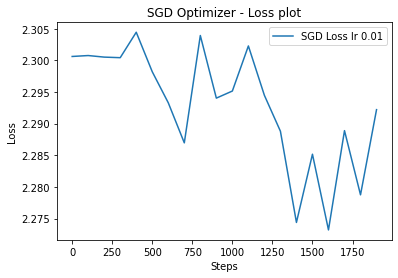

In [20]:
plt.plot(step_sgd, loss_sgd, label="SGD Loss lr 0.01")

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('SGD Optimizer - Loss plot')
plt.legend()
plt.show()

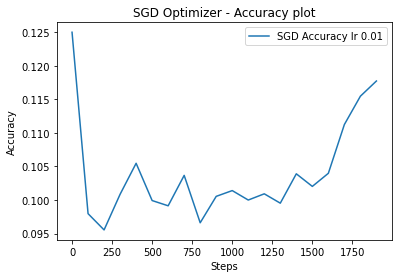

In [21]:
plt.plot(step_sgd, acc_sgd, label="SGD Accuracy lr 0.01")

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('SGD Optimizer - Accuracy plot')
plt.legend()
plt.show()

**Momentum = 0.5**

In [22]:
model_SGD_opt1 = model()
opt_sgd1 = tf.optimizers.SGD(learning_rate=0.01, momentum=0.5)

step_sgd1, loss_sgd1, acc_sgd1 = train(model_SGD_opt1, opt_sgd1)

step_all.append(step_sgd1)
loss_all.append(loss_sgd1)
acc_all.append(acc_sgd1)
opt_label.append('SGD momentum 0.5')

Loss: 2.3025028705596924 Accuracy: 0.09375
Loss: 2.302137613296509 Accuracy: 0.09945312142372131
Loss: 2.3017005920410156 Accuracy: 0.09992187470197678
Loss: 2.3005149364471436 Accuracy: 0.10906250029802322
Loss: 2.3004932403564453 Accuracy: 0.10515997558832169
Loss: 2.300879716873169 Accuracy: 0.10851562768220901
Loss: 2.297450065612793 Accuracy: 0.14296874403953552
Loss: 2.3001365661621094 Accuracy: 0.1498437523841858
Loss: 2.2983150482177734 Accuracy: 0.1603669971227646
Loss: 2.296264886856079 Accuracy: 0.1379687488079071
Loss: 2.2983388900756836 Accuracy: 0.12070312350988388
Loss: 2.2807445526123047 Accuracy: 0.13703125715255737
Loss: 2.283884048461914 Accuracy: 0.15707339346408844
Loss: 2.2753305435180664 Accuracy: 0.18132811784744263
Loss: 2.241835594177246 Accuracy: 0.18562500178813934
Loss: 2.2504358291625977 Accuracy: 0.20476561784744263
Loss: 2.225470542907715 Accuracy: 0.21925972402095795
Loss: 2.2574195861816406 Accuracy: 0.23265625536441803
Loss: 2.19684100151062 Accuracy:

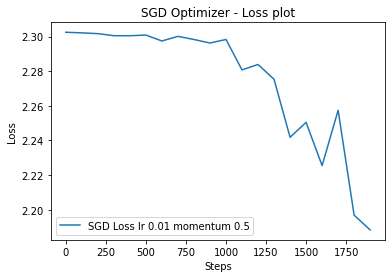

In [23]:
plt.plot(step_sgd1, loss_sgd1, label="SGD Loss lr 0.01 momentum 0.5")

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('SGD Optimizer - Loss plot')
plt.legend()
plt.show()

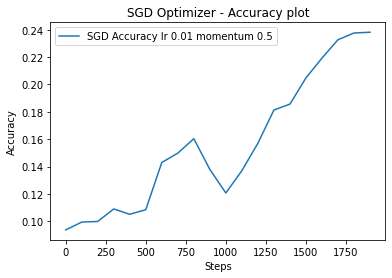

In [24]:
plt.plot(step_sgd1, acc_sgd1, label="SGD Accuracy lr 0.01 momentum 0.5")

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('SGD Optimizer - Accuracy plot')
plt.legend()
plt.show()

**Momentum = 0.9**

In [25]:
model_SGD_opt2 = model()
opt_sgd2 = tf.optimizers.SGD(learning_rate=0.01, momentum=0.9)

step_sgd2, loss_sgd2, acc_sgd2 = train(model_SGD_opt2, opt_sgd2)

step_all.append(step_sgd2)
loss_all.append(loss_sgd2)
acc_all.append(acc_sgd2)
opt_label.append('SGD momentum 0.9')

Loss: 2.3023529052734375 Accuracy: 0.109375
Loss: 2.299720525741577 Accuracy: 0.10414062440395355
Loss: 2.291447401046753 Accuracy: 0.10859374701976776
Loss: 2.2742702960968018 Accuracy: 0.10765624791383743
Loss: 2.261479139328003 Accuracy: 0.1670326292514801
Loss: 2.208920955657959 Accuracy: 0.22359375655651093
Loss: 2.2066855430603027 Accuracy: 0.2510937452316284
Loss: 2.198362350463867 Accuracy: 0.2581250071525574
Loss: 2.187049388885498 Accuracy: 0.2780740261077881
Loss: 2.1673481464385986 Accuracy: 0.30085936188697815
Loss: 2.1650357246398926 Accuracy: 0.3139062523841858
Loss: 2.1278014183044434 Accuracy: 0.3282812535762787
Loss: 2.132242202758789 Accuracy: 0.331869512796402
Loss: 2.1232385635375977 Accuracy: 0.3492187559604645
Loss: 2.0873823165893555 Accuracy: 0.3532031178474426
Loss: 2.0339062213897705 Accuracy: 0.35609376430511475
Loss: 2.0612215995788574 Accuracy: 0.3693538308143616
Loss: 2.0776431560516357 Accuracy: 0.3810156285762787
Loss: 2.0598342418670654 Accuracy: 0.390

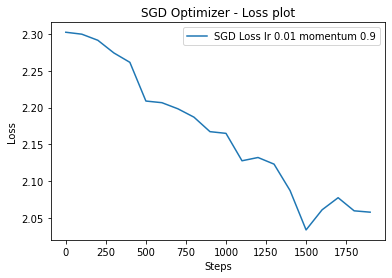

In [26]:
plt.plot(step_sgd2, loss_sgd2, label="SGD Loss lr 0.01 momentum 0.9")

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('SGD Optimizer - Loss plot')
plt.legend()
plt.show()

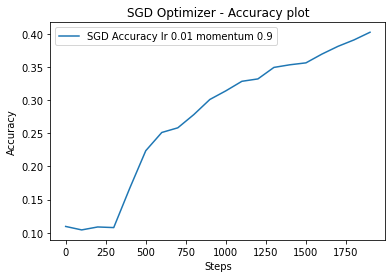

In [27]:
plt.plot(step_sgd2, acc_sgd2, label="SGD Accuracy lr 0.01 momentum 0.9")

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('SGD Optimizer - Accuracy plot')
plt.legend()
plt.show()

**Learning rate = 0.001 Momentum = 0.9**

In [28]:
model_SGD_opt3 = model()
opt_sgd3 = tf.optimizers.SGD(learning_rate=0.001, momentum=0.9)

step_sgd3, loss_sgd3, acc_sgd3 = train(model_SGD_opt3, opt_sgd3)

step_all.append(step_sgd3)
loss_all.append(loss_sgd3)
acc_all.append(acc_sgd3)
opt_label.append('SGD lr 0.001 momentum 0.9')

Loss: 2.303962469100952 Accuracy: 0.109375
Loss: 2.302183151245117 Accuracy: 0.10390625149011612
Loss: 2.3040218353271484 Accuracy: 0.10851562768220901
Loss: 2.3009676933288574 Accuracy: 0.10593750327825546
Loss: 2.303943395614624 Accuracy: 0.10084692388772964
Loss: 2.301304340362549 Accuracy: 0.10265625268220901
Loss: 2.302335262298584 Accuracy: 0.10195312649011612
Loss: 2.3040783405303955 Accuracy: 0.09898437559604645
Loss: 2.302344799041748 Accuracy: 0.12476474046707153
Loss: 2.301661968231201 Accuracy: 0.12937499582767487
Loss: 2.301788330078125 Accuracy: 0.13445311784744263
Loss: 2.297959089279175 Accuracy: 0.13273437321186066
Loss: 2.2983436584472656 Accuracy: 0.11747176945209503
Loss: 2.296674966812134 Accuracy: 0.11484374850988388
Loss: 2.29601788520813 Accuracy: 0.11531250178813934
Loss: 2.301412582397461 Accuracy: 0.11148437857627869
Loss: 2.303044319152832 Accuracy: 0.10131744295358658
Loss: 2.2975006103515625 Accuracy: 0.10210937261581421
Loss: 2.2997334003448486 Accuracy: 

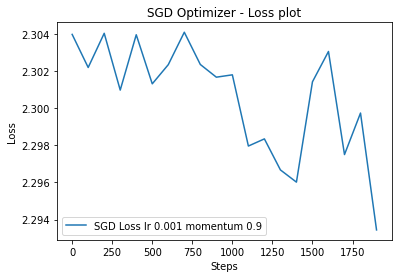

In [29]:
plt.plot(step_sgd3, loss_sgd3, label="SGD Loss lr 0.001 momentum 0.9")

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('SGD Optimizer - Loss plot')
plt.legend()
plt.show()

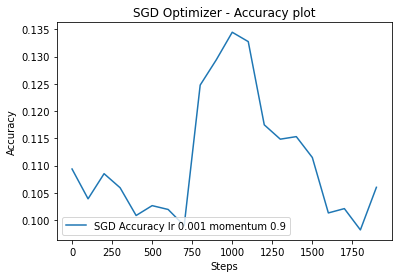

In [30]:
plt.plot(step_sgd3, acc_sgd3, label="SGD Accuracy lr 0.001 momentum 0.9")

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('SGD Optimizer - Accuracy plot')
plt.legend()
plt.show()

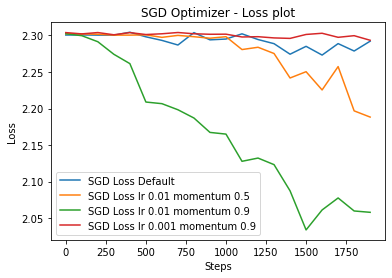

In [31]:
plt.plot(step_sgd, loss_sgd, label="SGD Loss Default")
plt.plot(step_sgd1, loss_sgd1, label="SGD Loss lr 0.01 momentum 0.5")
plt.plot(step_sgd2, loss_sgd2, label="SGD Loss lr 0.01 momentum 0.9")
plt.plot(step_sgd3, loss_sgd3, label="SGD Loss lr 0.001 momentum 0.9")

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('SGD Optimizer - Loss plot')
plt.legend()
plt.show()

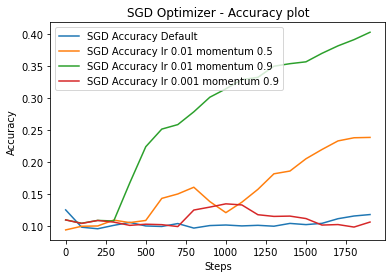

In [32]:
plt.plot(step_sgd, acc_sgd, label="SGD Accuracy Default")
plt.plot(step_sgd1, acc_sgd1, label="SGD Accuracy lr 0.01 momentum 0.5")
plt.plot(step_sgd2, acc_sgd2, label="SGD Accuracy lr 0.01 momentum 0.9")
plt.plot(step_sgd3, acc_sgd3, label="SGD Accuracy lr 0.001 momentum 0.9")

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('SGD Optimizer - Accuracy plot')
plt.legend()
plt.show()

## RMSprop Optimizer

In [33]:
model_RMS_opt = model()
opt_rms = tf.optimizers.RMSprop()

step_rms, loss_rms, acc_rms = train(model_RMS_opt, opt_rms)

step_all.append(step_rms)
loss_all.append(loss_rms)
acc_all.append(acc_rms)
opt_label.append('RMSprop Default')

Loss: 2.30305814743042 Accuracy: 0.078125
Loss: 2.1468257904052734 Accuracy: 0.21187500655651093
Loss: 2.052767276763916 Accuracy: 0.3042968809604645
Loss: 2.1592955589294434 Accuracy: 0.36429688334465027
Loss: 2.0864381790161133 Accuracy: 0.3851160705089569
Loss: 2.0322422981262207 Accuracy: 0.4137499928474426
Loss: 2.0406179428100586 Accuracy: 0.4332812428474426
Loss: 2.01794695854187 Accuracy: 0.4475781321525574
Loss: 1.9925222396850586 Accuracy: 0.4628293514251709
Loss: 1.9861987829208374 Accuracy: 0.4749999940395355
Loss: 1.9269297122955322 Accuracy: 0.49085938930511475
Loss: 1.9627842903137207 Accuracy: 0.5073437690734863
Loss: 1.9650417566299438 Accuracy: 0.5162327289581299
Loss: 1.8879144191741943 Accuracy: 0.5271875262260437
Loss: 1.9653538465499878 Accuracy: 0.5357812643051147
Loss: 2.002361297607422 Accuracy: 0.5478125214576721
Loss: 1.8652868270874023 Accuracy: 0.5609316229820251
Loss: 1.9283210039138794 Accuracy: 0.5739843845367432
Loss: 1.8722695112228394 Accuracy: 0.5669

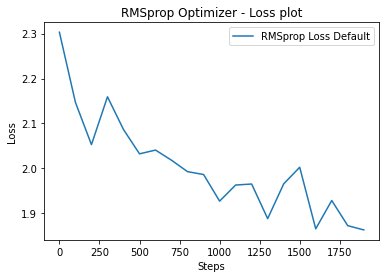

In [34]:
plt.plot(step_rms, loss_rms, label="RMSprop Loss Default")

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('RMSprop Optimizer - Loss plot')
plt.legend()
plt.show()

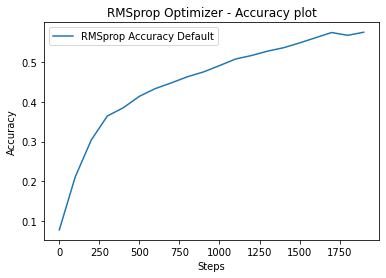

In [35]:
plt.plot(step_rms, acc_rms, label="RMSprop Accuracy Default")

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('RMSprop Optimizer - Accuracy plot')
plt.legend()
plt.show()

# Comparision between all optimizer on model 1

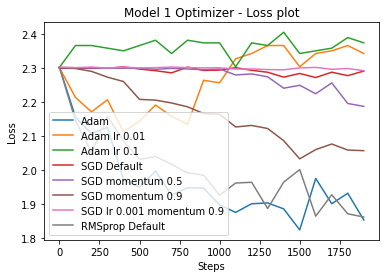

In [36]:
for i in range(len(opt_label)):
  plt.plot(step_all[i], loss_all[i], label=opt_label[i])

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('Model 1 Optimizer - Loss plot')
plt.legend()
plt.show()

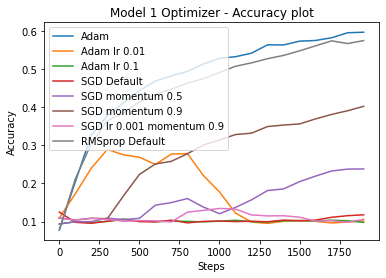

In [37]:
for i in range(len(opt_label)):
  plt.plot(step_all[i], acc_all[i], label=opt_label[i])

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('Model 1 Optimizer - Accuracy plot')
plt.legend()
plt.show()

# With Model 2

In [38]:
step_all2 = []
loss_all2 = []
acc_all2 = []
opt_label2 = []

## Adam Optimizer

**Default Hyperparameter**

In [39]:
model2_adam_opt = model2()
opt2_adam = tf.optimizers.Adam()

step2_adam, loss2_adam, acc2_adam = train(model2_adam_opt, opt2_adam)

step_all2.append(step2_adam)
loss_all2.append(loss2_adam)
acc_all2.append(acc2_adam)
opt_label2.append('Adam Default')

Loss: 2.314439296722412 Accuracy: 0.0625
Loss: 2.3361501693725586 Accuracy: 0.09875000268220901
Loss: 2.3674001693725586 Accuracy: 0.09929687529802322
Loss: 2.3517751693725586 Accuracy: 0.1003125011920929
Loss: 2.3205251693725586 Accuracy: 0.10147427767515182
Loss: 2.3283376693725586 Accuracy: 0.09984374791383743
Loss: 2.3674001693725586 Accuracy: 0.10000000149011612
Loss: 2.3127126693725586 Accuracy: 0.1003125011920929
Loss: 2.3752126693725586 Accuracy: 0.09927854686975479
Loss: 2.3595876693725586 Accuracy: 0.10093750059604645
Loss: 2.3517751693725586 Accuracy: 0.09992187470197678
Loss: 2.3595876693725586 Accuracy: 0.10000000149011612
Loss: 2.3595876693725586 Accuracy: 0.0996706411242485
Loss: 2.3674001693725586 Accuracy: 0.09976562857627869
Loss: 2.3127126693725586 Accuracy: 0.09875000268220901
Loss: 2.3595876693725586 Accuracy: 0.10187499970197678
Loss: 2.3986501693725586 Accuracy: 0.09833751618862152
Loss: 2.3517751693725586 Accuracy: 0.09906250238418579
Loss: 2.3674001693725586 Ac

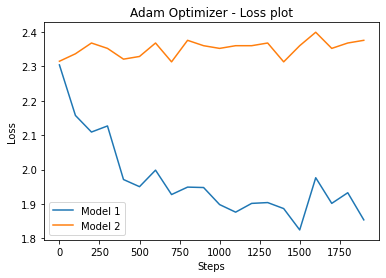

In [40]:
plt.plot(step_adam, loss_adam, label="Model 1")
plt.plot(step2_adam, loss2_adam, label="Model 2")

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('Adam Optimizer - Loss plot')
plt.legend()
plt.show()

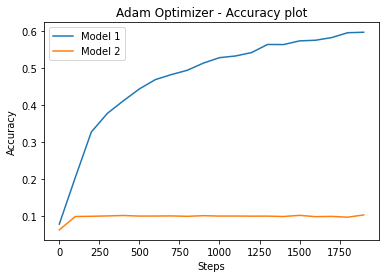

In [41]:
plt.plot(step_adam, acc_adam, label="Model 1")
plt.plot(step2_adam, acc2_adam, label="Model 2")

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('Adam Optimizer - Accuracy plot')
plt.legend()
plt.show()

**Learning Rate = 0.01**

In [42]:
model2_adam_opt2 = model2()
opt2_adam2 = tf.optimizers.Adam(learning_rate=0.01)

step2_adam1, loss2_adam1, acc2_adam1 = train(model2_adam_opt2, opt2_adam2)

step_all2.append(step2_adam1)
loss_all2.append(loss2_adam1)
acc_all2.append(acc2_adam1)
opt_label2.append('Adam lr 0.01')

Loss: 2.301717758178711 Accuracy: 0.09375
Loss: 2.3439626693725586 Accuracy: 0.09828124940395355
Loss: 2.3830251693725586 Accuracy: 0.10078124701976776
Loss: 2.3752126693725586 Accuracy: 0.09914062172174454
Loss: 2.3283376693725586 Accuracy: 0.10092534869909286
Loss: 2.3439626693725586 Accuracy: 0.09789062291383743
Loss: 2.3595876693725586 Accuracy: 0.10078124701976776
Loss: 2.3361501693725586 Accuracy: 0.10164062678813934
Loss: 2.3595876693725586 Accuracy: 0.10006273537874222
Loss: 2.4064626693725586 Accuracy: 0.10398437827825546
Loss: 2.3752126693725586 Accuracy: 0.09968750178813934
Loss: 2.3439626693725586 Accuracy: 0.09968750178813934
Loss: 2.3674001693725586 Accuracy: 0.09394604712724686
Loss: 2.3361501693725586 Accuracy: 0.10062500089406967
Loss: 2.3361501693725586 Accuracy: 0.09929687529802322
Loss: 2.3830251693725586 Accuracy: 0.10132812708616257
Loss: 2.3674001693725586 Accuracy: 0.10076850652694702
Loss: 2.3283376693725586 Accuracy: 0.10023437440395355
Loss: 2.351775169372558

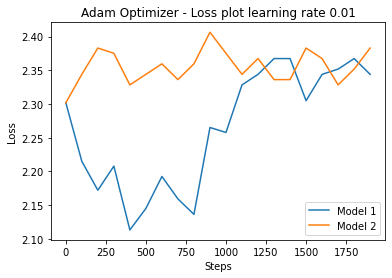

In [43]:
plt.plot(step_adam1, loss_adam1, label="Model 1")
plt.plot(step2_adam1, loss2_adam1, label="Model 2")

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('Adam Optimizer - Loss plot learning rate 0.01')
plt.legend()
plt.show()

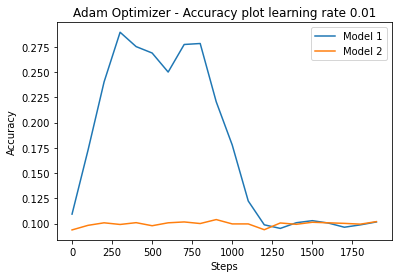

In [44]:
plt.plot(step_adam1, acc_adam1, label="Model 1")
plt.plot(step2_adam1, acc2_adam1, label="Model 2")

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('Adam Optimizer - Accuracy plot learning rate 0.01')
plt.legend()
plt.show()

**Learning rate = 0.1**

In [45]:
model2_adam_opt3 = model2()
opt2_adam3 = tf.optimizers.Adam(learning_rate=0.1)

step2_adam2, loss2_adam2, acc2_adam2 = train(model2_adam_opt3, opt2_adam3)

step_all2.append(step2_adam2)
loss_all2.append(loss2_adam2)
acc_all2.append(acc2_adam2)
opt_label2.append('Adam lr 0.1')

Loss: 2.2996437549591064 Accuracy: 0.1484375
Loss: 2.3674001693725586 Accuracy: 0.09507812559604645
Loss: 2.3361501693725586 Accuracy: 0.10242187231779099
Loss: 2.3439626693725586 Accuracy: 0.10015624761581421
Loss: 2.3595876693725586 Accuracy: 0.10021957010030746
Loss: 2.3439626693725586 Accuracy: 0.10179687291383743
Loss: 2.3517751693725586 Accuracy: 0.10132812708616257
Loss: 2.3517751693725586 Accuracy: 0.09546875208616257
Loss: 2.3752126693725586 Accuracy: 0.10296423733234406
Loss: 2.3986501693725586 Accuracy: 0.10117187350988388
Loss: 2.3283376693725586 Accuracy: 0.09820312261581421
Loss: 2.3361501693725586 Accuracy: 0.0983593761920929
Loss: 2.3830251693725586 Accuracy: 0.10398368537425995
Loss: 2.3439626693725586 Accuracy: 0.10132812708616257
Loss: 2.3908376693725586 Accuracy: 0.10070312768220901
Loss: 2.3283376693725586 Accuracy: 0.09773437678813934
Loss: 2.3595876693725586 Accuracy: 0.09590652585029602
Loss: 2.3361501693725586 Accuracy: 0.09882812201976776
Loss: 2.3517751693725

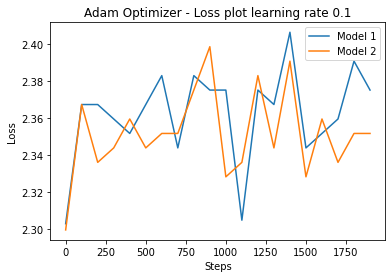

In [46]:
plt.plot(step_adam2, loss_adam2, label="Model 1")
plt.plot(step2_adam2, loss2_adam2, label="Model 2")

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('Adam Optimizer - Loss plot learning rate 0.1')
plt.legend()
plt.show()

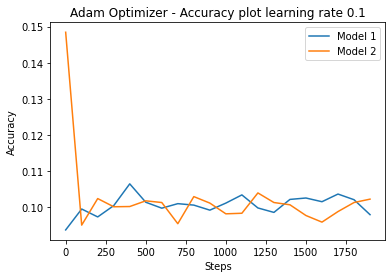

In [47]:
plt.plot(step_adam2, acc_adam2, label="Model 1")
plt.plot(step2_adam2, acc2_adam2, label="Model 2")

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('Adam Optimizer - Accuracy plot learning rate 0.1')
plt.legend()
plt.show()

## SGD Optimizer

**Default Hyperparameter**

In [48]:
model2_SGD_opt = model2()
opt2_sgd = tf.optimizers.SGD()

step2_sgd, loss2_sgd, acc2_sgd = train(model2_SGD_opt, opt2_sgd)

step_all2.append(step2_sgd)
loss_all2.append(loss2_sgd)
acc_all2.append(acc2_sgd)
opt_label2.append('SGD Default')

Loss: 2.290931224822998 Accuracy: 0.1640625
Loss: 2.257011890411377 Accuracy: 0.15351562201976776
Loss: 2.251842498779297 Accuracy: 0.20726563036441803
Loss: 2.2510948181152344 Accuracy: 0.23000000417232513
Loss: 2.1882755756378174 Accuracy: 0.24905897676944733
Loss: 2.2209653854370117 Accuracy: 0.27085936069488525
Loss: 2.218686103820801 Accuracy: 0.27601563930511475
Loss: 2.1659841537475586 Accuracy: 0.29414063692092896
Loss: 2.1895923614501953 Accuracy: 0.2946988642215729
Loss: 2.189028739929199 Accuracy: 0.29750001430511475
Loss: 2.1704726219177246 Accuracy: 0.31343749165534973
Loss: 2.0642096996307373 Accuracy: 0.3171093761920929
Loss: 2.1408214569091797 Accuracy: 0.3291248381137848
Loss: 2.1399693489074707 Accuracy: 0.33140623569488525
Loss: 2.131577491760254 Accuracy: 0.34617188572883606
Loss: 2.1023898124694824 Accuracy: 0.35249999165534973
Loss: 2.149892568588257 Accuracy: 0.350768506526947
Loss: 2.098065137863159 Accuracy: 0.3499999940395355
Loss: 2.0988218784332275 Accuracy:

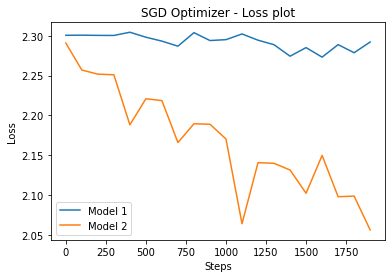

In [49]:
plt.plot(step_sgd, loss_sgd, label="Model 1")
plt.plot(step2_sgd, loss2_sgd, label="Model 2")

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('SGD Optimizer - Loss plot')
plt.legend()
plt.show()

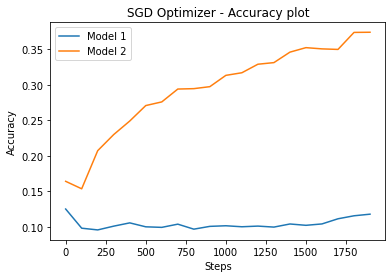

In [50]:
plt.plot(step_sgd, acc_sgd, label="Model 1")
plt.plot(step2_sgd, acc2_sgd, label="Model 2")

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('SGD Optimizer - Accuracy plot')
plt.legend()
plt.show()

**Momentum = 0.5**

In [51]:
model2_SGD_opt1 = model2()
opt2_sgd1 = tf.optimizers.SGD(momentum=0.5)

step2_sgd1, loss2_sgd1, acc2_sgd1 = train(model2_SGD_opt1, opt2_sgd1)

step_all2.append(step2_sgd1)
loss_all2.append(loss2_sgd1)
acc_all2.append(acc2_sgd1)
opt_label2.append('SGD momentum 0.5')

Loss: 2.3113973140716553 Accuracy: 0.109375
Loss: 2.2984461784362793 Accuracy: 0.16015625
Loss: 2.226034164428711 Accuracy: 0.23359374701976776
Loss: 2.215677261352539 Accuracy: 0.25773438811302185
Loss: 2.1819772720336914 Accuracy: 0.2870922088623047
Loss: 2.168194532394409 Accuracy: 0.2984375059604645
Loss: 2.1449832916259766 Accuracy: 0.30476561188697815
Loss: 2.1023125648498535 Accuracy: 0.3117968738079071
Loss: 2.1225228309631348 Accuracy: 0.3306148052215576
Loss: 2.109099864959717 Accuracy: 0.3471093773841858
Loss: 2.1189041137695312 Accuracy: 0.3532031178474426
Loss: 2.134413242340088 Accuracy: 0.36625000834465027
Loss: 2.0778450965881348 Accuracy: 0.3639429211616516
Loss: 2.071059465408325 Accuracy: 0.37984374165534973
Loss: 2.050814628601074 Accuracy: 0.3881250023841858
Loss: 2.054295539855957 Accuracy: 0.3831250071525574
Loss: 2.051471710205078 Accuracy: 0.404093474149704
Loss: 2.140594482421875 Accuracy: 0.3950781226158142
Loss: 2.0581209659576416 Accuracy: 0.405703127384185

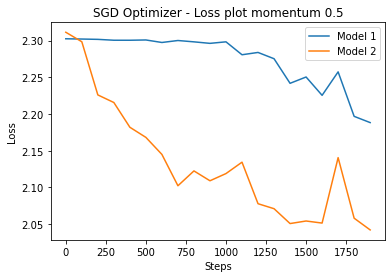

In [52]:
plt.plot(step_sgd1, loss_sgd1, label="Model 1")
plt.plot(step2_sgd1, loss2_sgd1, label="Model 2")

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('SGD Optimizer - Loss plot momentum 0.5')
plt.legend()
plt.show()

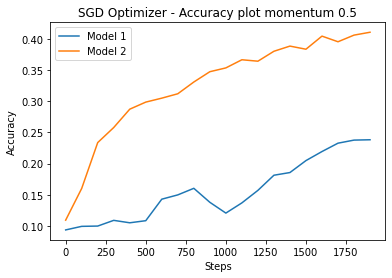

In [53]:
plt.plot(step_sgd1, acc_sgd1, label="Model 1")
plt.plot(step2_sgd1, acc2_sgd1, label="Model 2")

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('SGD Optimizer - Accuracy plot momentum 0.5')
plt.legend()
plt.show()

**Momentum = 0.9**

In [54]:
model2_SGD_opt2 = model2()
opt2_sgd2 = tf.optimizers.SGD(momentum=0.9)

step2_sgd2, loss2_sgd2, acc2_sgd2 = train(model2_SGD_opt2, opt2_sgd2)

step_all2.append(step2_sgd2)
loss_all2.append(loss2_sgd2)
acc_all2.append(acc2_sgd2)
opt_label2.append('SGD momentum 0.9')

Loss: 2.296725273132324 Accuracy: 0.1328125
Loss: 2.1509194374084473 Accuracy: 0.20679686963558197
Loss: 2.144068479537964 Accuracy: 0.28609374165534973
Loss: 2.0962204933166504 Accuracy: 0.3446093797683716
Loss: 2.0502235889434814 Accuracy: 0.3726474344730377
Loss: 2.0592198371887207 Accuracy: 0.39453125
Loss: 2.0614395141601562 Accuracy: 0.42585936188697815
Loss: 1.936913013458252 Accuracy: 0.43828123807907104
Loss: 1.9375749826431274 Accuracy: 0.4492628574371338
Loss: 1.9364840984344482 Accuracy: 0.4749999940395355
Loss: 1.9276930093765259 Accuracy: 0.4703125059604645
Loss: 2.020561695098877 Accuracy: 0.4896875023841858
Loss: 1.916701316833496 Accuracy: 0.5101160407066345
Loss: 1.912559986114502 Accuracy: 0.5103124976158142
Loss: 1.9169641733169556 Accuracy: 0.5321875214576721
Loss: 1.8888461589813232 Accuracy: 0.5266406536102295
Loss: 1.9448697566986084 Accuracy: 0.5271329879760742
Loss: 1.8945848941802979 Accuracy: 0.5594531297683716
Loss: 1.8751295804977417 Accuracy: 0.5582031011

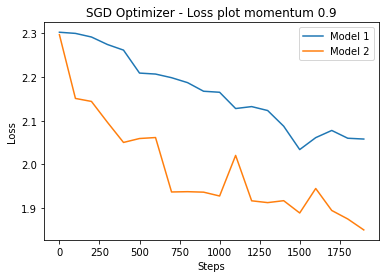

In [55]:
plt.plot(step_sgd2, loss_sgd2, label="Model 1")
plt.plot(step2_sgd2, loss2_sgd2, label="Model 2")

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('SGD Optimizer - Loss plot momentum 0.9')
plt.legend()
plt.show()

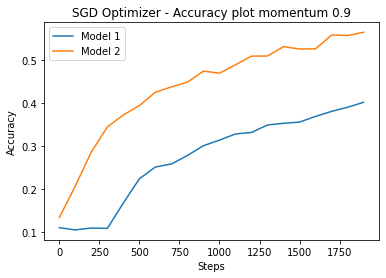

In [56]:
plt.plot(step_sgd2, acc_sgd2, label="Model 1")
plt.plot(step2_sgd2, acc2_sgd2, label="Model 2")

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('SGD Optimizer - Accuracy plot momentum 0.9')
plt.legend()
plt.show()

## RMSprop Optimizer

**Default Hyperparameter**

In [57]:
model2_RMS_opt = model2()
opt2_rms = tf.optimizers.RMSprop()

step2_rms, loss2_rms, acc2_rms = train(model2_RMS_opt, opt2_rms)

step_all2.append(step2_rms)
loss_all2.append(loss2_rms)
acc_all2.append(acc2_rms)
opt_label2.append('RMSprop Default')

Loss: 2.3070735931396484 Accuracy: 0.125
Loss: 2.177558422088623 Accuracy: 0.2052343785762787
Loss: 2.045994281768799 Accuracy: 0.32906249165534973
Loss: 2.0474369525909424 Accuracy: 0.3649218678474426
Loss: 2.0858230590820312 Accuracy: 0.3919385075569153
Loss: 1.930878758430481 Accuracy: 0.4175781309604645
Loss: 1.9591286182403564 Accuracy: 0.4495312571525574
Loss: 1.9542276859283447 Accuracy: 0.45359376072883606
Loss: 1.9449498653411865 Accuracy: 0.4707496762275696
Loss: 1.945581078529358 Accuracy: 0.4895312488079071
Loss: 1.914717197418213 Accuracy: 0.49937498569488525
Loss: 1.9912235736846924 Accuracy: 0.5135937333106995
Loss: 2.008819103240967 Accuracy: 0.5220357775688171
Loss: 1.927183747291565 Accuracy: 0.5277343988418579
Loss: 1.8747408390045166 Accuracy: 0.5217187404632568
Loss: 1.9588499069213867 Accuracy: 0.5229687690734863
Loss: 1.9985538721084595 Accuracy: 0.509567141532898
Loss: 1.9610686302185059 Accuracy: 0.5131250023841858
Loss: 1.9579511880874634 Accuracy: 0.512265622

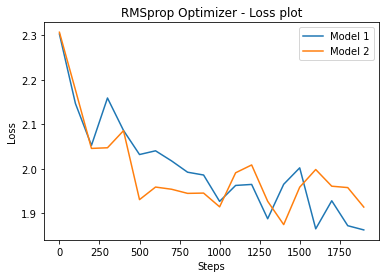

In [58]:
plt.plot(step_rms, loss_rms, label="Model 1")
plt.plot(step2_rms, loss2_rms, label="Model 2")

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('RMSprop Optimizer - Loss plot')
plt.legend()
plt.show()

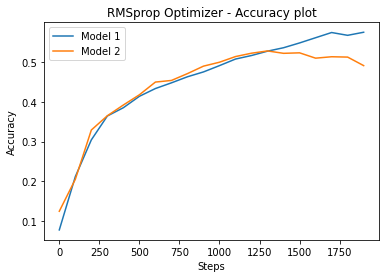

In [59]:
plt.plot(step_rms, acc_rms, label="Model 1")
plt.plot(step2_rms, acc2_rms, label="Model 2")

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('RMSprop Optimizer - Accuracy plot')
plt.legend()
plt.show()

# Comparision between all optimizer on Model 2

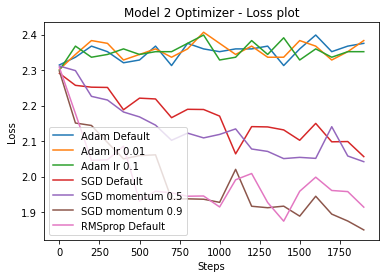

In [60]:
for i in range(len(opt_label2)):
  plt.plot(step_all2[i], loss_all2[i], label=opt_label2[i])

plt.xlabel('Steps')
plt.ylabel('Loss')

plt.title('Model 2 Optimizer - Loss plot')
plt.legend()
plt.show()

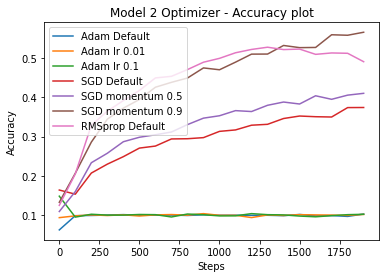

In [61]:
for i in range(len(opt_label2)):
  plt.plot(step_all2[i], acc_all2[i], label=opt_label2[i])

plt.xlabel('Steps')
plt.ylabel('Accuracy')

plt.title('Model 2 Optimizer - Accuracy plot')
plt.legend()
plt.show()

# Conclusion

---



*   It was observed that all the optimizers worked better with the second architecture
*   Different hyperparameter gives different results
*   Lower the learning rate better the training
*   More momentum gives better results
*   Adam optimizer gave better result compare to SGD and RMSprop optimizers

